In [175]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import math 

In [52]:
df = pd.read_csv(r"미세콜록파_단어사전.csv") 
  

In [80]:
df

,Unnamed: 0,word,pos_count,neg_count,score
0,6,미세먼지/Noun,60583.0,28432.0,0.592826
1,97,안녕하다/Adjective,11674.0,4374.0,0.742548
2,126,꼭/Noun,9737.0,4027.0,0.672709
3,140,운동/Noun,9121.0,3718.0,0.682522
4,142,밥/Noun,9110.0,3299.0,0.768281
5,146,봄/Noun,9023.0,3515.0,0.714183
6,170,내일/Noun,7948.0,3559.0,0.621318
7,173,시/Noun,7882.0,3017.0,0.726850
8,213,주문/Noun,6682.0,2618.0,0.710102
9,229,따뜻하다/Adjective,6408.0,2449.0,0.727977


In [266]:
keywords = {}
for idx,val in enumerate(df.word):
    if df.neg_count[idx] > 600 and df.pos_count[idx] > 100:
        a = {'{}'.format(val.split('/')[0]):abs((df.score[idx]-2))}
        keywords.update(a)

In [267]:
keywords

{'가득하다': 1.3509798375231896,
 '간식': 1.2448848268314265,
 '감': 1.422788992120472,
 '강남': 1.2726673505928257,
 '경기': 1.3630944186583236,
 '국물': 1.4082172143388854,
 '기사': 1.2489975694993052,
 '김': 1.2507809174646978,
 '김밥': 1.387839120880531,
 '김치': 1.3643603649868794,
 '꼭': 1.327290717832819,
 '끼': 1.2955650562453107,
 '나쁘다': 1.6717171272248645,
 '남자': 1.280402963195563,
 '내일': 1.3786822651879593,
 '농도': 1.4773739147263054,
 '다이어트': 1.3414842031894825,
 '답답하다': 1.4405919052514267,
 '대기': 1.2564483036229104,
 '대중교통': 1.7699657177428314,
 '대책': 1.5014377631221276,
 '대통령': 1.254636874989217,
 '디자인': 1.2514510999379829,
 '따뜻하다': 1.2720231014147951,
 '딸기': 1.4062168917451783,
 '라인': 1.3027848098537285,
 '마늘': 1.2893834693262618,
 '마스크': 1.7936847306867776,
 '맛집': 1.3279750855736399,
 '먼지': 1.2447520724764698,
 '메뉴': 1.327120908988905,
 '목': 1.2684859460029048,
 '무료': 1.3986104549452154,
 '문의': 1.2676723919583155,
 '문자': 1.6231742552111228,
 '미세': 1.2456470264356696,
 '미세먼지': 1.40717399717212

In [268]:
# keywords = {'이것':5, '예문':3, '단어':5, '빈도수':3}

wordcloud = WordCloud()
# wordcloud = wordcloud.generate_from_text(texts)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [269]:
font_path = 'NanumBarunGothic.ttf'

In [274]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    min_font_size = 10
#     background_color ='white'
)
wordcloud = wordcloud.generate_from_frequencies(keywords)

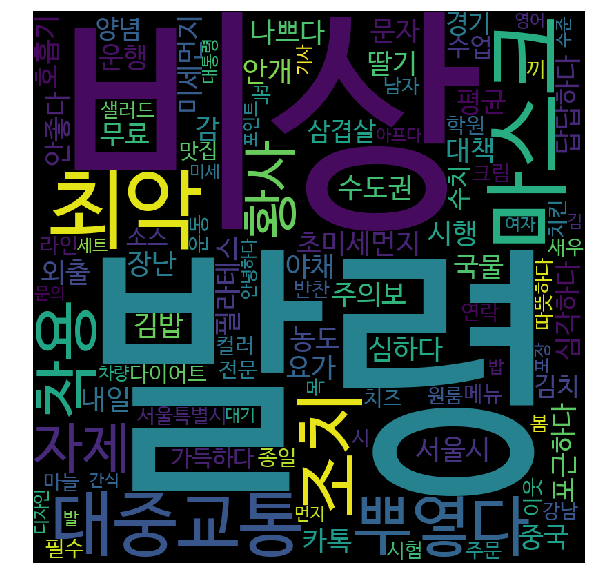

In [275]:
# wordcloud = WordCloud(width = 800, height = 800, font_path = font_path,
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [87]:
df2 = pd.read_csv(r"화창행복파_단어사전.csv") 

In [88]:
df2

,Unnamed: 0,word,pos_count,neg_count,score
0,18,날씨/Noun,34964.0,7028.0,1.384118
1,26,도/Noun,28522.0,5323.0,1.490759
2,31,비/Noun,27405.0,3426.0,2.225493
3,46,하늘/Noun,19124.0,3276.0,1.624122
4,81,바람/Noun,13172.0,2169.0,1.689569
5,96,기온/Noun,11693.0,1674.0,1.943365
6,113,구름/Noun,10427.0,1272.0,2.280637
7,127,최고/Noun,9727.0,1974.0,1.370931
8,131,공원/Noun,9447.0,1492.0,1.761607
9,136,산/Noun,9304.0,1949.0,1.328134


In [207]:
keywords2 = {}
for idx,val in enumerate(df2.word):
    try:
        if df2.pos_count[idx] > 2000 and df2.neg_count[idx] > 100:
            a = {'{}'.format(val.split('/')[0]):df2.score[idx]}
            keywords2.update(a)
    except:
        pass

In [208]:
keywords2

{'가을': 2.876292535014483,
 '강하다': 1.7371067439976058,
 '개발': 1.6386856349762338,
 '계곡': 2.1339640949134133,
 '공원': 1.7616067755169078,
 '구름': 2.2806368749792525,
 '그것': 1.3060283452602108,
 '기상청': 2.5715584126211692,
 '기술': 1.4854907104950748,
 '기온': 1.9433649955419943,
 '길이': 1.4058024689769657,
 '깨끗하다': 1.5293821192767778,
 '나들이': 1.4018821793579674,
 '나무': 1.5066453426026485,
 '날씨': 1.3841183888252941,
 '낮': 1.3357252582837869,
 '낮다': 1.9258808599453958,
 '놀이터': 1.5740149325511799,
 '능선': 1.5036973923673642,
 '대전': 1.359794768247247,
 '대체로': 1.8890856500689637,
 '덥다': 2.0745671034214506,
 '도': 1.4907588257212132,
 '도로': 1.359274549126023,
 '도시': 1.552965010674555,
 '등산': 1.6624426834305144,
 '땀': 1.485208904473834,
 '뜨겁다': 1.5007074088677597,
 '마을': 1.3064601344129751,
 '맑다': 1.8284804242425008,
 '맑은': 1.8184917325047956,
 '맑음': 1.867250039964864,
 '망': 1.3395471086739643,
 '멀리': 1.461749886846384,
 '문화': 1.6617463171777829,
 '물이': 1.4259342466838731,
 '미래': 1.410661739384414,
 '바다'

In [209]:
keywords2['도']

1.4907588257212132

In [210]:
# keywords = {'이것':5, '예문':3, '단어':5, '빈도수':3}

# stopwords = {'도':0}

# wordcloud = WordCloud(stopwords=stopwords)
# wordcloud = WordCloud()
# wordcloud = wordcloud.generate_from_text(texts)
wordcloud = wordcloud.generate_from_frequencies(keywords2)

In [211]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    min_font_size = 10
#     background_color ='white'
)
wordcloud = wordcloud.generate_from_frequencies(keywords2)

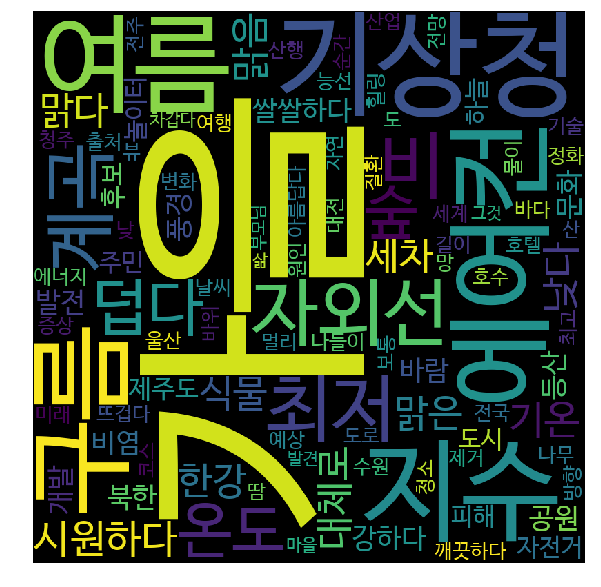

In [212]:
# wordcloud = WordCloud(width = 800, height = 800, font_path = font_path,
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [278]:
date = pd.read_csv('날짜별블로그센티맨트.csv', index_col = 0)

In [287]:
date.index = date.date

In [290]:
date = date.drop?

In [291]:
date = date.drop('date', axis = 1)

In [294]:
date.to_csv('시각화용_센티먼트.csv')